In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model



In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/initial_caffeine.xlsx')

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:02<00:00, 20.83it/s]


Data size (rows, columns): (58, 1613)
Data size after first reduction (rows, columns): (58, 1388)
Data size after second reduction (rows, columns): (58, 1137)


In [3]:
without_standarization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'linear_model',
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
   molecular descriptor name  corr_value  absolute correlation value
1                   AATS0are    0.342320                    0.342320
8            

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


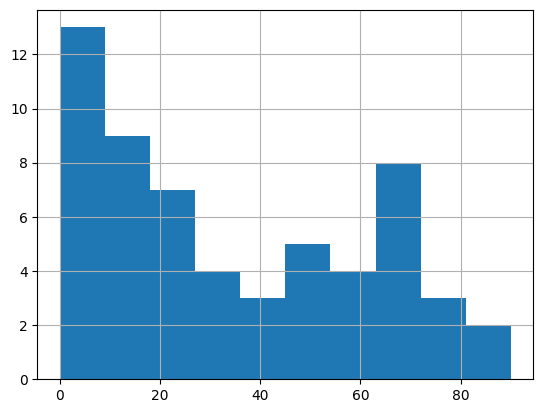

In [4]:
print('Target distribution histogram: ')
print(hist1['Aktywność cytoprotekcyjna [%]'].hist())

In [5]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 64


In [6]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
1,AATS0are,0.342320,0.342320
8,AATS0s,0.350131,0.350131
9,AATS0se,0.363989,0.363989
12,AATS1are,0.352396,0.352396
18,AATS1pe,0.338436,0.338436
...,...,...,...
864,SddsN,-0.335349,0.335349
932,SsSH,0.335381,0.335381
936,SssO,0.335389,0.335389
1101,nBondsD,0.369996,0.369996


In [7]:
with_standarization, train_r2, test_r2, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standarization = True, 
                                                                                                    model_type = 'linear_model',
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = True)

I am doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
   molecular descriptor name  corr_value  absolute correlation value
1                   AATS0are    0.342320                    0.342320
8                

In [8]:
with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([-1.06113817e+03,  4.50000000e+01,  6.50000000e+01,  1.50000000e+01,
        9.99999995e+00, -2.66901573e+02,  7.99999996e+00, -2.03726813e-08,
       -2.57277861e-08,  9.00000000e+01,  8.00000000e+01,  5.50000000e+01,
        7.50000000e+01,  5.50000000e+01,  9.99999999e+00,  5.00000000e+01,
        4.50000000e+01, -9.19681042e-09,  4.99999998e+00, -1.38534233e-08,
        1.00000000e+01, -2.17696652e-08,  9.99999998e+00,  1.16415322e-10,
        4.99999998e+00,  9.99999999e+00,  7.99999999e+00,  5.00000003e+00,
        7.00000000e+01,  2.00000000e+01,  2.50000000e+01,  7.00000000e+01,
        6.00000000e+01,  3.00000000e+01,  5.18971580e+01,  5.00000000e+01,
        7.00000000e+01,  9.00000000e+01,  7.00000000e+01,  6.00000001e+01,
        8.00000000e+01,  6.50000001e+01,  6.50000000e+01,  1.60000000e+01,
        2.30000000e+01,  1.00000000e+01,  4.00000000e+01,  4.50000000e+01,
        2.00000000e+01,  3.00000000e+01,  2.00000000e+01,  2.60000000e+01,
        3.79999998e+01,  

In [9]:
xs = r2_score(with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])
xs

0.05783418453081923

## Search inside correlation space

In [10]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'linear_model',
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))


In [11]:
df_without_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list

In [12]:
df_without_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.30,1.000000,-0.173698,87
1,0.31,1.000000,-0.468790,75
2,0.32,1.000000,-1.457522,72
3,0.33,1.000000,-1.624079,64
4,0.34,0.987058,-0.487345,52
5,0.35,0.975145,-0.463573,45
6,0.36,0.903041,-0.546554,38
7,0.37,0.867630,-0.902680,31
8,0.38,0.860249,-1.084290,29
9,0.39,0.784155,-3.710479,23


In [13]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = True, 
                                                                                                    model_type = 'linear_model',
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))

In [14]:
df_with_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_with_standarization['Training data R^2 score'] = second_list
df_with_standarization['Test data R^2 score'] = third_list
df_with_standarization['Number of features'] = f_list

In [15]:
df_with_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.30,1.000000,-1.615494,87
1,0.31,1.000000,-4.312265,75
2,0.32,1.000000,-2.685844,72
3,0.33,1.000000,-0.139474,64
4,0.34,0.987058,-0.487345,52
5,0.35,0.975145,-0.463573,45
6,0.36,0.903041,-0.546554,38
7,0.37,0.867630,-0.902680,31
8,0.38,0.860249,-1.084290,29
9,0.39,0.784155,-3.710479,23


## Plots

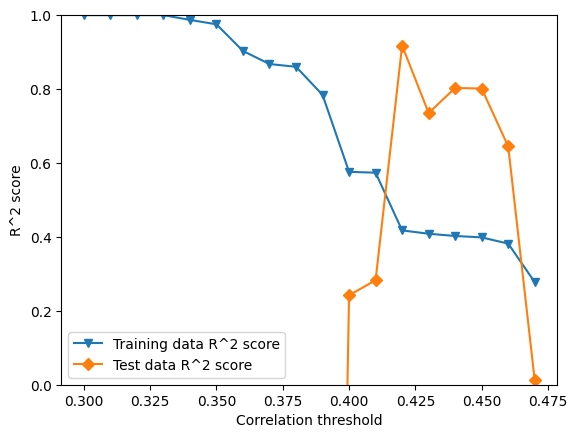

In [16]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

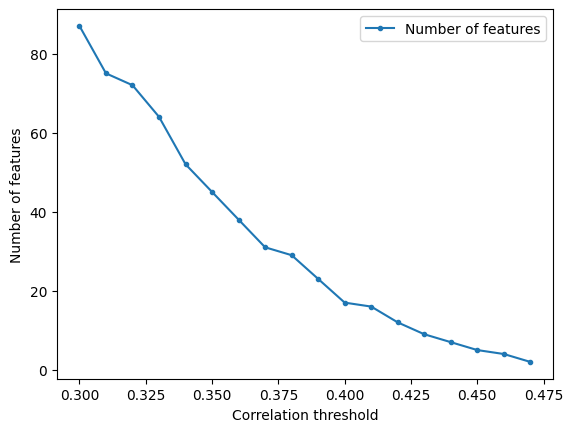

In [17]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## sqrt(R^2)

In [18]:
df_without_standarization['train R value'] = [np.sqrt(x) for x in df_without_standarization['Training data R^2 score']]

In [19]:
df_without_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,train R value
0,0.30,1.000000,-0.173698,87,1.000000
1,0.31,1.000000,-0.468790,75,1.000000
2,0.32,1.000000,-1.457522,72,1.000000
3,0.33,1.000000,-1.624079,64,1.000000
4,0.34,0.987058,-0.487345,52,0.993508
5,0.35,0.975145,-0.463573,45,0.987494
6,0.36,0.903041,-0.546554,38,0.950285
7,0.37,0.867630,-0.902680,31,0.931467
8,0.38,0.860249,-1.084290,29,0.927496
9,0.39,0.784155,-3.710479,23,0.885525


In [20]:
xcz = []
for element in df_without_standarization['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [21]:
df_without_standarization['test R value'] = xcz

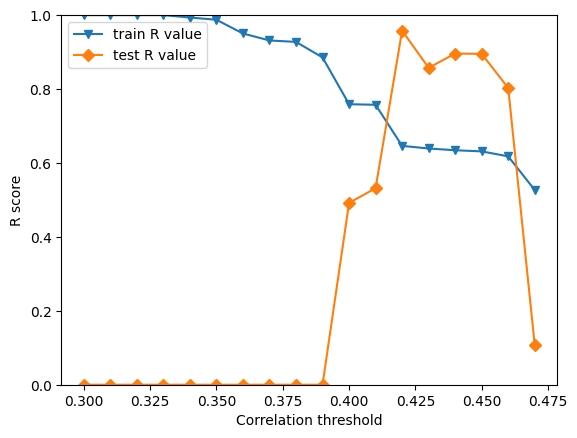

In [22]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['train R value'], label = "train R value", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

In [23]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'linear_model',
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))
    
df_without_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_without_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.30,1.000000,-0.291890,87
1,0.31,1.000000,-0.075085,75
2,0.32,1.000000,-0.037371,72
3,0.33,1.000000,-0.144972,64
4,0.34,0.999997,-0.098324,52
5,0.35,0.980604,-0.675580,45
6,0.36,0.903751,0.135844,38
7,0.37,0.870926,0.056086,31
8,0.38,0.868897,0.079584,29
9,0.39,0.798570,0.413352,23


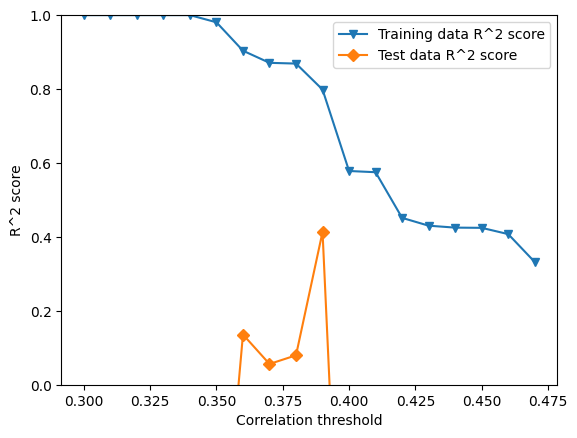

In [24]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

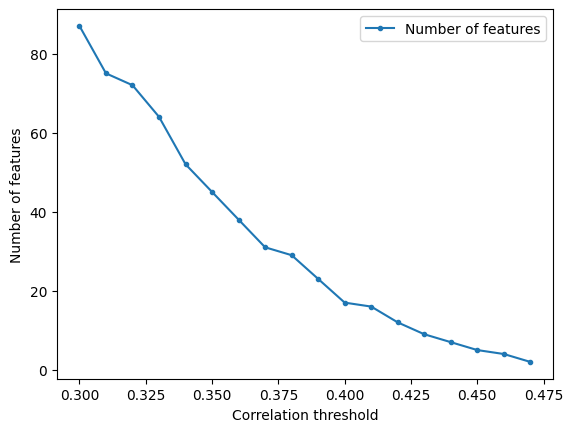

In [25]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## Final model

In [ ]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                      correlation_threshold = 0.34, 
                                                      standarization = False, 
                                                      model_type = 'linear_model', 
                                                      train_test_split_ = False, 
                                                      verbose = True)

In [ ]:
final_model[0].get_params()

In [ ]:
final_model[0].intercept_

In [ ]:
final_model[0].coef_

## Build equation

In [ ]:
final_model[4]

In [ ]:
names = list(final_model[4]['molecular descriptor name'])
print("The model's equation is: ")
for i in range(len(names)):
    print(str(final_model[0].coef_[i])+str(' * ')+str(names[i]))
    
print(str(final_model[0].intercept_))

## Predict target feature

In [ ]:
Err

In [ ]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')

In [ ]:
predicted_activity = final_model[0].predict(to_prediction[final_model[4]['molecular descriptor name']])

In [ ]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [ ]:
print(len(smiles))
print(len(predicted_activity))

In [ ]:
save_to_df.head()

In [ ]:
save_to_df['Predicted activity'] = predicted_activity

In [ ]:
save_to_df.head()

In [ ]:
#save_to_df.to_excel('../Data/Predicted_activity.xlsx')